<h2> Grand Junction Flood Risk Model </h2>

<b> 1. Import Data </b>

In [1]:
data_directory: str = 'C:/Users/l2pdwds9/Desktop/Grand_Junction/Import_Data/'
terrain_file: str = 'terrain.tif' # raster file containing terrain DEM data
inventory_file: str = 'GJ_Inventory_REV1.shp' # shapefile containing structure inventory data
floodplain_13JUN_file: str = 'Depth_13JUN3000_WOP.tif' # imports depth raster for 13JUN without project floodplain

<b> 2. Terrain Data </b>

In [2]:
import rasterio as rio 
import earthpy.plot as ep
import matplotlib.pyplot as plt 
from rasterio.plot import plotting_extent
import scipy 
dataset = rio.open(data_directory + terrain_file) #open terrain data
print('terrain.tif: {bands: ' + str(dataset.count) + ', width: ' + str(dataset.width) + ', height: ' + str(dataset.height) + '}')
terrain = dataset.read(1, masked = True)

terrain.tif: {bands: 1, width: 3750, height: 2500}


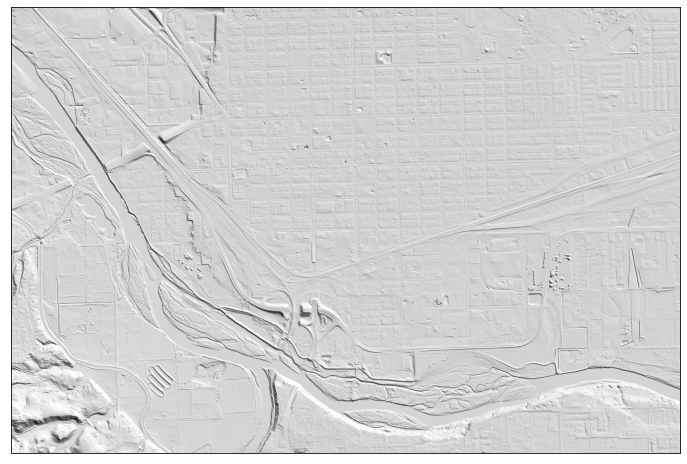

In [106]:
import earthpy.spatial as es

hillshade = es.hillshade(terrain)
ep.plot_bands(hillshade, cbar=False)
plt.show()

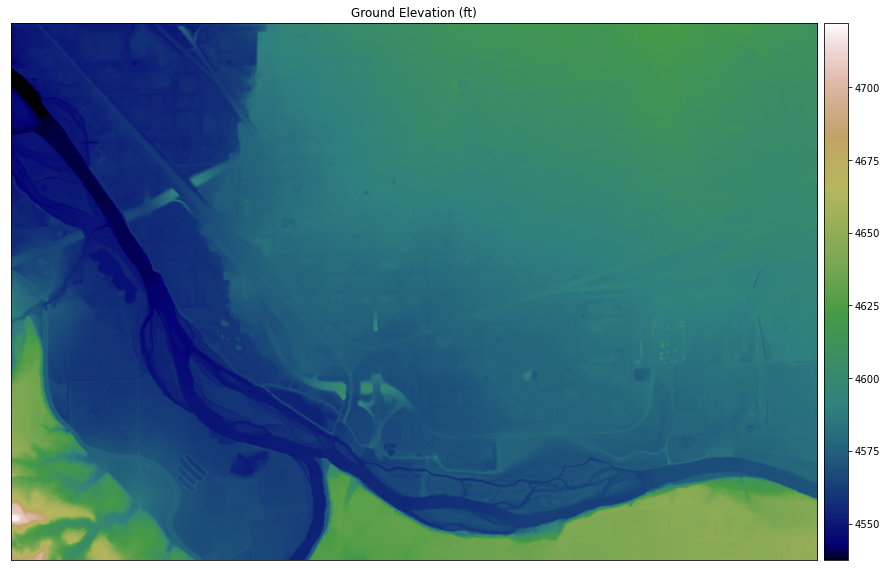

In [98]:

fig, ax = plt.subplots(figsize=(15,10)) #following code plots terrain data
ep.plot_bands(terrain, extent=plotting_extent(dataset), cmap='gist_earth',  title="Ground Elevation (ft)", ax=ax) # color maps: https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html

plt.show()


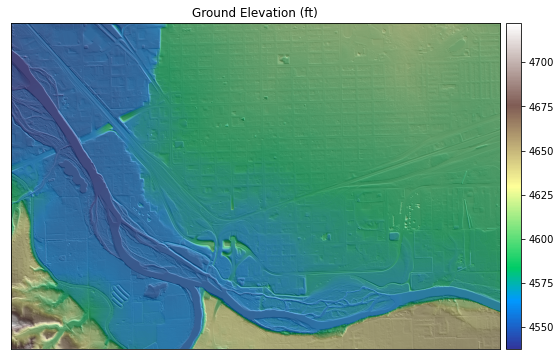

In [101]:
#hillshade https://earthpy.readthedocs.io/en/latest/gallery_vignettes/plot_dem_hillshade.html#sphx-glr-gallery-vignettes-plot-dem-hillshade-py

fig, ax=plt.subplots(figsize=(10, 6))
ep.plot_bands(terrain, ax=ax, cmap='terrain', title="Ground Elevation (ft)")
ax.imshow(hillshade, cmap='Greys', alpha=0.5)
plt.show()

<b> 3. Structure Inventory Data </b>

In [4]:
import geopandas
from IPython.display import display, HTML

inventory = geopandas.read_file(data_directory + inventory_file)
inventory.head() 

PARCELNUM          LOCATION     PROPTYPE  IMPVALCUR  IMPASSCUR  \
0  294515429015  417 LAWRENCE AVE  Residential    80330.0     5740.0   
1  294515427024  412 CHULUOTA AVE  Residential    78370.0     5600.0   
2  294515440001     409 W MAIN ST  Residential   134440.0     9610.0   
3  294515400128     522 W MAIN ST       Exempt        0.0        0.0   
4  294515425007      405 PARK AVE  Residential        0.0        0.0   

   IMPVALPRE  IMPASSPRE   Shape_STAr  Shape_STLe    CENTROID_X    CENTROID_Y  \
0    70630.0     5090.0   580.738649  106.692563 -7.474879e+06  2.043955e+06   
1    71470.0     5150.0   412.127252   95.959131 -7.475471e+06  2.044205e+06   
2   120000.0     8640.0  1088.966122  167.092720 -7.475143e+06  2.045092e+06   
3        0.0        0.0   731.922527  126.539910 -7.475373e+06  2.045419e+06   
4        0.0        0.0   870.176749  121.878587 -7.475948e+06  2.044423e+06   

                           geometry  
0  POINT (-7474879.167 2043955.435)  
1  POINT (-7475470.764 2044205.108)  
2  POINT (-7475142.897 2045091.686)  
3  POINT (-7475373.331 2045419.329)  
4  POINT (-7475948.383 2044422.662)

In [5]:
print(dataset.crs)

EPSG:26912


In [6]:
print(inventory.crs)

PROJCS["NAD83 / Maryland (ftUS)",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AUTHORITY["EPSG","4269"]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["latitude_of_origin",37.6666666666667],PARAMETER["central_meridian",-77],PARAMETER["standard_parallel_1",38.3],PARAMETER["standard_parallel_2",39.45],PARAMETER["false_easting",1312333.33333333],PARAMETER["false_northing",0],UNIT["US survey foot",0.304800609601219,AUTHORITY["EPSG","9003"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [7]:
inventory = inventory.to_crs(dataset.crs) # check that inventory and terrain use same CRS, per https://geopandas.org/mapping.html

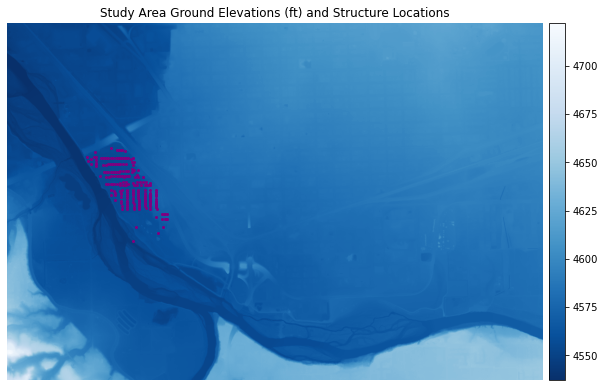

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))
ep.plot_bands(terrain, extent=plotting_extent(dataset), cmap='Blues_r', title="Study Area Ground Elevations (ft) and Structure Locations", scale=False, ax=ax)
inventory.plot(ax=ax, marker='o', markersize=4,  color='purple')
ax.set_axis_off()
plt.show()
#overlays structures on terrain plot

<b> 4. Import Hydraulic Data </b>

In [9]:
dataset=rio.open(data_directory + floodplain_13JUN_file)
print('Depth_13JUN3000_WOP.tif: {bands: ' + str(dataset.count) + ', width: ' + str(dataset.width) + ' , height: ' + str(dataset.height) +'}')
floodplain13june = dataset.read(1, masked = True)
# importing 13june floodplain, without project

Depth_13JUN3000_WOP.tif: {bands: 1, width: 3750 , height: 2500}


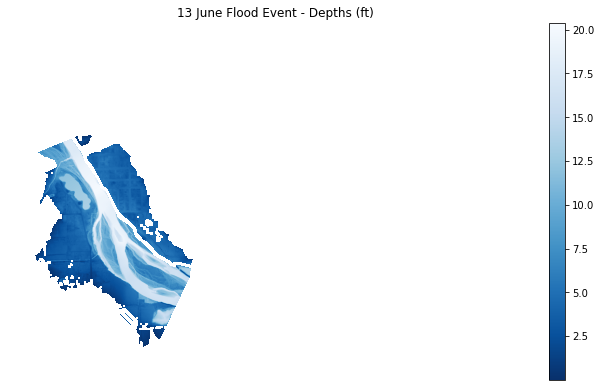

In [10]:
#plot hydraulic data
fig, ax = plt.subplots(figsize=(10,10))
ep.plot_bands(floodplain13june, extent=plotting_extent(dataset), cmap='Blues_r', title="13 June Flood Event - Depths (ft)", scale=False, ax=ax)
ax.set_axis_off()
plt.show()


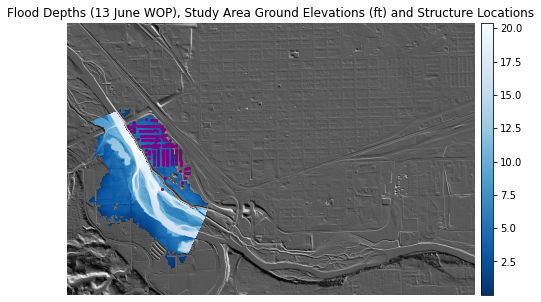

In [109]:
#plot hydraulic data on terrain
fig, ax = plt.subplots(figsize=(10, 5))
ep.plot_bands(hillshade, extent=plotting_extent(dataset), cmap='Greys', title="Flood Depths (13 June WOP), Study Area Ground Elevations (ft) and Structure Locations", scale=False, ax=ax, cbar=False)
ep.plot_bands(floodplain13june, extent=plotting_extent(dataset), cmap='Blues_r', scale=False, ax=ax)
inventory.plot(ax=ax, marker='o', markersize=4,  color='purple')
ax.set_axis_off()
plt.show()

In [12]:
#importing future without project (WOP) floodplains
floodplain_12JUN_file: str = 'Depth_12JUN3000_WOP.tif'
floodplain_11JUN_file: str = 'Depth_11JUN3000_WOP.tif'
floodplain_10JUN_file: str = 'Depth_10JUN3000_WOP.tif'
floodplain_09JUN_file: str = 'Depth_09JUN3000_WOP.tif'
floodplain_08JUN_file: str = 'Depth_08JUN3000_WOP.tif'
floodplain_07JUN_file: str = 'Depth_07JUN3000_WOP.tif'

In [13]:
#importing future with project floodplains for floodwall altternative (FW)
floodplain_13JUNFW_file: str = 'Depth_13JUN3000_FW.tif'
floodplain_12JUNFW_file: str = 'Depth_12JUN3000_FW.tif'
floodplain_11JUNFW_file: str = 'Depth_11JUN3000_FW.tif'
floodplain_10JUNFW_file: str = 'Depth_10JUN3000_FW.tif'
floodplain_09JUNFW_file: str = 'Depth_09JUN3000_FW.tif'
floodplain_08JUNFW_file: str = 'Depth_08JUN3000_FW.tif'
floodplain_07JUNFW_file: str = 'Depth_07JUN3000_FW.tif'

<b> 5. Join Terrain, Floodplain, Inventory Data </b>


In [14]:
#add elevation to inventory at each point
from rasterstats import zonal_stats, point_query
inventory['elevation']=-999
elevation_array=point_query(inventory, data_directory + terrain_file)
for i, row in inventory.iterrows():
    inventory.loc[i, 'elevation'] = elevation_array[i]
inventory.head()

PARCELNUM          LOCATION     PROPTYPE  IMPVALCUR  IMPASSCUR  \
0  294515429015  417 LAWRENCE AVE  Residential    80330.0     5740.0   
1  294515427024  412 CHULUOTA AVE  Residential    78370.0     5600.0   
2  294515440001     409 W MAIN ST  Residential   134440.0     9610.0   
3  294515400128     522 W MAIN ST       Exempt        0.0        0.0   
4  294515425007      405 PARK AVE  Residential        0.0        0.0   

   IMPVALPRE  IMPASSPRE   Shape_STAr  Shape_STLe    CENTROID_X    CENTROID_Y  \
0    70630.0     5090.0   580.738649  106.692563 -7.474879e+06  2.043955e+06   
1    71470.0     5150.0   412.127252   95.959131 -7.475471e+06  2.044205e+06   
2   120000.0     8640.0  1088.966122  167.092720 -7.475143e+06  2.045092e+06   
3        0.0        0.0   731.922527  126.539910 -7.475373e+06  2.045419e+06   
4        0.0        0.0   870.176749  121.878587 -7.475948e+06  2.044423e+06   

                           geometry    elevation  
0  POINT (2329171.678 14195252.981)  4574.279986  
1  POINT (2328529.665 14195270.184)  4558.348866  
2  POINT (2328512.317 14196215.462)  4562.847631  
3  POINT (2328178.366 14196436.789)  4557.233696  
4  POINT (2328005.524 14195298.963)  4557.017949

In [15]:
#loop to add WOP depths to each strcuture
#list of wop_events
wop_events = ['JUNE07WOP','JUNE08WOP','JUNE09WOP','JUNE10WOP','JUNE11WOP','JUNE12WOP','JUNE13WOP']
#list of wop file names
wop_files = ['floodplain_07JUN_file', 'floodplain_08JUN_file', 'floodplain_09JUN_file', 'floodplain_10JUN_file', 'floodplain_11JUN_file', 'floodplain_12JUN_file', 'floodplain_13JUN_file']
#list of fw_events
fw_events = ['JUNE07FW','JUNE08FW','JUNE09FW','JUNE10FW','JUNE11FW','JUNE12FW','JUNE13FW']

In [16]:
#create list of tuples using wop_event and wop_files https://stackoverflow.com/questions/2407398/how-to-merge-lists-into-a-list-of-tuples 
wop = list(zip(wop_events,wop_files))

In [17]:
print(wop)

[('JUNE07WOP', 'floodplain_07JUN_file'), ('JUNE08WOP', 'floodplain_08JUN_file'), ('JUNE09WOP', 'floodplain_09JUN_file'), ('JUNE10WOP', 'floodplain_10JUN_file'), ('JUNE11WOP', 'floodplain_11JUN_file'), ('JUNE12WOP', 'floodplain_12JUN_file'), ('JUNE13WOP', 'floodplain_13JUN_file')]


In [19]:
#add wop depths to each strucure
from rasterstats import zonal_stats, point_query
#EVENTUALLY: write loop to attached depths to structures


from rasterstats import zonal_stats, point_query
inventory['JUNE13FW']=-999
JUNE13FW_array=point_query(inventory, data_directory+floodplain_13JUNFW_file)
for i, row in inventory.iterrows():
    inventory.loc[i, 'JUNE13FW'] = JUNE13FW_array[i]


In [20]:
#add WOP depths to each structure
from rasterstats import zonal_stats, point_query
inventory['JUNE13WOP']=-999
JUNE13WOP_array=point_query(inventory, data_directory+floodplain_13JUN_file)
for i, row in inventory.iterrows():
    inventory.loc[i, 'JUNE13WOP'] = JUNE13WOP_array[i]

inventory['JUNE12WOP']=-999
JUNE12WOP_array=point_query(inventory, data_directory+floodplain_12JUN_file)
for i, row in inventory.iterrows():
    inventory.loc[i, 'JUNE12WOP'] = JUNE12WOP_array[i]

inventory['JUNE11WOP']=-999
JUNE11WOP_array=point_query(inventory, data_directory+floodplain_11JUN_file)
for i, row in inventory.iterrows():
    inventory.loc[i, 'JUNE11WOP'] = JUNE11WOP_array[i]

inventory['JUNE10WOP']=-999
JUNE10WOP_array=point_query(inventory, data_directory+floodplain_10JUN_file)
for i, row in inventory.iterrows():
    inventory.loc[i, 'JUNE10WOP'] = JUNE10WOP_array[i]

inventory['JUNE09WOP']=-999
JUNE09WOP_array=point_query(inventory, data_directory+floodplain_09JUN_file)
for i, row in inventory.iterrows():
    inventory.loc[i, 'JUNE09WOP'] = JUNE09WOP_array[i]

inventory['JUNE08WOP']=-999
JUNE08WOP_array=point_query(inventory, data_directory+floodplain_08JUN_file)
for i, row in inventory.iterrows():
    inventory.loc[i, 'JUNE08WOP'] = JUNE08WOP_array[i]

inventory['JUNE07WOP']=-999
JUNE07WOP_array=point_query(inventory, data_directory+floodplain_07JUN_file)
for i, row in inventory.iterrows():
    inventory.loc[i, 'JUNE07WOP'] = JUNE07WOP_array[i]

inventory.head()

PARCELNUM          LOCATION     PROPTYPE  IMPVALCUR  IMPASSCUR  \
0  294515429015  417 LAWRENCE AVE  Residential    80330.0     5740.0   
1  294515427024  412 CHULUOTA AVE  Residential    78370.0     5600.0   
2  294515440001     409 W MAIN ST  Residential   134440.0     9610.0   
3  294515400128     522 W MAIN ST       Exempt        0.0        0.0   
4  294515425007      405 PARK AVE  Residential        0.0        0.0   

   IMPVALPRE  IMPASSPRE   Shape_STAr  Shape_STLe    CENTROID_X  ...  \
0    70630.0     5090.0   580.738649  106.692563 -7.474879e+06  ...   
1    71470.0     5150.0   412.127252   95.959131 -7.475471e+06  ...   
2   120000.0     8640.0  1088.966122  167.092720 -7.475143e+06  ...   
3        0.0        0.0   731.922527  126.539910 -7.475373e+06  ...   
4        0.0        0.0   870.176749  121.878587 -7.475948e+06  ...   

                           geometry    elevation  JUNE13FW  JUNE13WOP  \
0  POINT (2329171.678 14195252.981)  4574.279986       NaN        NaN   
1  POINT (2328529.665 14195270.184)  4558.348866  1.320567   3.707913   
2  POINT (2328512.317 14196215.462)  4562.847631       NaN        NaN   
3  POINT (2328178.366 14196436.789)  4557.233696  2.435249   3.762783   
4  POINT (2328005.524 14195298.963)  4557.017949  2.651485   4.721587   

   JUNE12WOP  JUNE11WOP  JUNE10WOP  JUNE09WOP  JUNE08WOP  JUNE07WOP  
0        NaN        NaN        NaN        NaN        NaN        NaN  
1   2.659980   1.625310   0.614570        NaN        NaN        NaN  
2        NaN        NaN        NaN        NaN        NaN        NaN  
3   2.619538   1.457737   0.249022        NaN        NaN        NaN  
4   3.654931   2.602182   1.545733   0.489096        NaN        NaN  

[5 rows x 21 columns]

In [21]:
#attached future with project floodplain depth to each structure for floodwall alternative
from rasterstats import zonal_stats, point_query
inventory['JUNE13FW']=-999
JUNE13FW_array=point_query(inventory, data_directory+floodplain_13JUNFW_file)
for i, row in inventory.iterrows():
    inventory.loc[i, 'JUNE13FW'] = JUNE13FW_array[i]

inventory['JUNE12FW']=-999
JUNE12FW_array=point_query(inventory, data_directory+floodplain_12JUNFW_file)
for i, row in inventory.iterrows():
    inventory.loc[i, 'JUNE12FW'] = JUNE12FW_array[i]

inventory['JUNE11FW']=-999
JUNE11FW_array=point_query(inventory, data_directory+floodplain_11JUNFW_file)
for i, row in inventory.iterrows():
    inventory.loc[i, 'JUNE11FW'] = JUNE11FW_array[i]

inventory['JUNE10FW']=-999
JUNE10FW_array=point_query(inventory, data_directory+floodplain_10JUNFW_file)
for i, row in inventory.iterrows():
    inventory.loc[i, 'JUNE10FW'] = JUNE10FW_array[i]

inventory['JUNE09FW']=-999
JUNE09FW_array=point_query(inventory, data_directory+floodplain_09JUNFW_file)
for i, row in inventory.iterrows():
    inventory.loc[i, 'JUNE09FW'] = JUNE09FW_array[i]

inventory['JUNE08FW']=-999
JUNE08FW_array=point_query(inventory, data_directory+floodplain_08JUNFW_file)
for i, row in inventory.iterrows():
    inventory.loc[i, 'JUNE08FW'] = JUNE08FW_array[i]

inventory['JUNE07FW']=-999
JUNE07FW_array=point_query(inventory, data_directory+floodplain_07JUNFW_file)
for i, row in inventory.iterrows():
    inventory.loc[i, 'JUNE07FW'] = JUNE07FW_array[i]

inventory.head()

PARCELNUM          LOCATION     PROPTYPE  IMPVALCUR  IMPASSCUR  \
0  294515429015  417 LAWRENCE AVE  Residential    80330.0     5740.0   
1  294515427024  412 CHULUOTA AVE  Residential    78370.0     5600.0   
2  294515440001     409 W MAIN ST  Residential   134440.0     9610.0   
3  294515400128     522 W MAIN ST       Exempt        0.0        0.0   
4  294515425007      405 PARK AVE  Residential        0.0        0.0   

   IMPVALPRE  IMPASSPRE   Shape_STAr  Shape_STLe    CENTROID_X  ...  \
0    70630.0     5090.0   580.738649  106.692563 -7.474879e+06  ...   
1    71470.0     5150.0   412.127252   95.959131 -7.475471e+06  ...   
2   120000.0     8640.0  1088.966122  167.092720 -7.475143e+06  ...   
3        0.0        0.0   731.922527  126.539910 -7.475373e+06  ...   
4        0.0        0.0   870.176749  121.878587 -7.475948e+06  ...   

   JUNE10WOP JUNE09WOP  JUNE08WOP  JUNE07WOP  JUNE12FW  JUNE11FW  JUNE10FW  \
0        NaN       NaN        NaN        NaN       NaN       NaN       NaN   
1   0.614570       NaN        NaN        NaN       NaN       NaN       NaN   
2        NaN       NaN        NaN        NaN       NaN       NaN       NaN   
3   0.249022       NaN        NaN        NaN       NaN       NaN       NaN   
4   1.545733  0.489096        NaN        NaN       NaN       NaN       NaN   

   JUNE09FW  JUNE08FW  JUNE07FW  
0       NaN       NaN       NaN  
1       NaN       NaN       NaN  
2       NaN       NaN       NaN  
3       NaN       NaN       NaN  
4       NaN       NaN       NaN  

[5 rows x 27 columns]

In [22]:
#descriptive statistics (count, median structure value) of structures in 13JUNEWOP floodplain
import pandas as pd

In [23]:
#residential structures in inventory
inventory["PROPTYPE"].describe()

count             212
unique              5
top       Residential
freq              180
Name: PROPTYPE, dtype: object

In [26]:
from rasterstats import zonal_stats
stats = zonal_stats ("C:/Users/l2pdwds9/Desktop/Grand_Junction/Import_Data/GJ_Inventory_REV1.shp", "C:/Users/l2pdwds9/Desktop/Grand_Junction/Import_Data/Depth_13JUN3000_WOP.tif", attribute = "JUNE13WOP", stats=['count'])

In [28]:
import numpy as np 
inventory["JUNE13WOP"].count()

173

In [29]:
from scipy import stats

In [30]:
stats.describe(inventory["JUNE13WOP"], nan_policy='omit')

DescribeResult(nobs=173, minmax=(masked_array(data=0.17138672,
             mask=False,
       fill_value=1e+20), masked_array(data=12.87966644,
             mask=False,
       fill_value=1e+20)), mean=3.741836032183717, variance=1.4306968625200114, skewness=masked_array(data=1.99298884,
             mask=False,
       fill_value=1e+20), kurtosis=19.192796557505112)

<b> Add first floor elevations </b>

In [31]:
#Add 1 foot to existing elevation to capture first floor elevation, per virtual window survey on Google Maps
for index, row in inventory.iterrows():
    inventory['FFE']=inventory['elevation']+1
inventory.head()

PARCELNUM          LOCATION     PROPTYPE  IMPVALCUR  IMPASSCUR  \
0  294515429015  417 LAWRENCE AVE  Residential    80330.0     5740.0   
1  294515427024  412 CHULUOTA AVE  Residential    78370.0     5600.0   
2  294515440001     409 W MAIN ST  Residential   134440.0     9610.0   
3  294515400128     522 W MAIN ST       Exempt        0.0        0.0   
4  294515425007      405 PARK AVE  Residential        0.0        0.0   

   IMPVALPRE  IMPASSPRE   Shape_STAr  Shape_STLe    CENTROID_X  ...  \
0    70630.0     5090.0   580.738649  106.692563 -7.474879e+06  ...   
1    71470.0     5150.0   412.127252   95.959131 -7.475471e+06  ...   
2   120000.0     8640.0  1088.966122  167.092720 -7.475143e+06  ...   
3        0.0        0.0   731.922527  126.539910 -7.475373e+06  ...   
4        0.0        0.0   870.176749  121.878587 -7.475948e+06  ...   

   JUNE09WOP JUNE08WOP  JUNE07WOP  JUNE12FW  JUNE11FW  JUNE10FW  JUNE09FW  \
0        NaN       NaN        NaN       NaN       NaN       NaN       NaN   
1        NaN       NaN        NaN       NaN       NaN       NaN       NaN   
2        NaN       NaN        NaN       NaN       NaN       NaN       NaN   
3        NaN       NaN        NaN       NaN       NaN       NaN       NaN   
4   0.489096       NaN        NaN       NaN       NaN       NaN       NaN   

   JUNE08FW  JUNE07FW          FFE  
0       NaN       NaN  4575.279986  
1       NaN       NaN  4559.348866  
2       NaN       NaN  4563.847631  
3       NaN       NaN  4558.233696  
4       NaN       NaN  4558.017949  

[5 rows x 28 columns]

<b> Create depth damage curve </b>

In [32]:
#use generic depth damage curve for single family res: https://planning.erdc.dren.mil/toolbox/library/EGMs/egm04-01.pdf

#creating list of tuples of depth damage curve
one_story_no_basement = [(-2, 0.000), (-1, 0.025), (0, 0.134), (1, 0.233), (2, 0.321), (3, 0.401), (4, 0.471), (5, 0.532), (6, 0.586), (7, 0.632), (8, 0.672), (9, 0.705), (10, 0.732), (11, 0.754), (12, 0.772), (13, 0.785), (14, 0.795), (15, 0.802), (16, 0.807)]

In [33]:
len(one_story_no_basement)
one_story_no_basement?

Type:        list
String form: [(-2, 0.0), (-1, 0.025), (0, 0.134), (1, 0.233), (2, 0.321), (3, 0.401), (4, 0.471), (5, 0.532),  <...> .705), (10, 0.732), (11, 0.754), (12, 0.772), (13, 0.785), (14, 0.795), (15, 0.802), (16, 0.807)]
Length:      19
Docstring:  
Built-in mutable sequence.

If no argument is given, the constructor creates a new empty list.
The argument must be an iterable if specified.


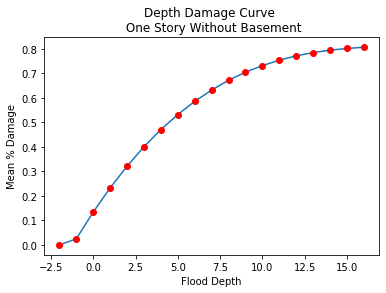

In [34]:
#ploting depth damage curve from list of tuples
import matplotlib.pyplot as plt
plt.plot(*zip(*one_story_no_basement))
plt.plot(*zip(*one_story_no_basement), 'or')
plt.title('Depth Damage Curve \n One Story Without Basement')
plt.xlabel('Flood Depth')
plt.ylabel('Mean % Damage')
plt.show()

In [35]:
#linear interpolation of depth damage curve: https://stackoverflow.com/questions/61707086/interpolation-from-data-plotted-with-tuples-in-lists-using-python

depth = [c[0] for c in one_story_no_basement]
damage = [c[1] for c in one_story_no_basement]

In [36]:
#check number of entries in depth and damage lists
len(depth)
len(damage)

19

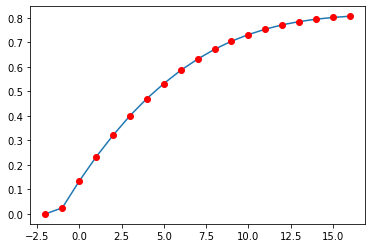

In [37]:
plt.plot(depth, damage)
plt.plot(depth, damage, 'or')
plt.show()

In [38]:
import scipy
from scipy import interpolate

depth_damage=interpolate.interp1d(depth, damage, kind='linear')

In [39]:
#testing interpolated depth damage function for depth of 1.5 feet
print(depth_damage(1.5))

0.277


In [40]:
#definition of depth damage function
def depth_dam_funct(x):
    return depth_damage(x)

<b> Calculate damages per event at each structure </b>

In [41]:
#define first floor elevation for (factor by which to shift down flood depths)
first_floor = 1

#create I-py widget with a slider, check interact tool

In [42]:
#loop to add column with percentage of damage at each structure for each event (depth damage function applied to depth per event, subtracting FFE from depth)

#without project
for wop_event in wop_events:
    inventory[f"{wop_event}_DAM_PERCENT"] = (inventory[f"{wop_event}"].apply(lambda x: depth_dam_funct(x-first_floor))).fillna(0)

#with project (floodwall alternative)
for fw_event in fw_events:
    inventory[f"{fw_event}_DAM_PERCENT"] = (inventory[f"{fw_event}"].apply(lambda x: depth_dam_funct(x-first_floor))).fillna(0)

inventory.head()

PARCELNUM          LOCATION     PROPTYPE  IMPVALCUR  IMPASSCUR  \
0  294515429015  417 LAWRENCE AVE  Residential    80330.0     5740.0   
1  294515427024  412 CHULUOTA AVE  Residential    78370.0     5600.0   
2  294515440001     409 W MAIN ST  Residential   134440.0     9610.0   
3  294515400128     522 W MAIN ST       Exempt        0.0        0.0   
4  294515425007      405 PARK AVE  Residential        0.0        0.0   

   IMPVALPRE  IMPASSPRE   Shape_STAr  Shape_STLe    CENTROID_X  ...  \
0    70630.0     5090.0   580.738649  106.692563 -7.474879e+06  ...   
1    71470.0     5150.0   412.127252   95.959131 -7.475471e+06  ...   
2   120000.0     8640.0  1088.966122  167.092720 -7.475143e+06  ...   
3        0.0        0.0   731.922527  126.539910 -7.475373e+06  ...   
4        0.0        0.0   870.176749  121.878587 -7.475948e+06  ...   

   JUNE11WOP_DAM_PERCENT JUNE12WOP_DAM_PERCENT  JUNE13WOP_DAM_PERCENT  \
0               0.000000              0.000000               0.000000   
1               0.195906              0.291078               0.377633   
2               0.000000              0.000000               0.000000   
3               0.179316              0.287519               0.382023   
4               0.285992              0.373394               0.451511   

   JUNE07FW_DAM_PERCENT  JUNE08FW_DAM_PERCENT  JUNE09FW_DAM_PERCENT  \
0                   0.0                   0.0                   0.0   
1                   0.0                   0.0                   0.0   
2                   0.0                   0.0                   0.0   
3                   0.0                   0.0                   0.0   
4                   0.0                   0.0                   0.0   

   JUNE10FW_DAM_PERCENT  JUNE11FW_DAM_PERCENT  JUNE12FW_DAM_PERCENT  \
0                   0.0                   0.0                   0.0   
1                   0.0                   0.0                   0.0   
2                   0.0                   0.0                   0.0   
3                   0.0                   0.0                   0.0   
4                   0.0                   0.0                   0.0   

   JUNE13FW_DAM_PERCENT  
0              0.000000  
1              0.165736  
2              0.000000  
3              0.271302  
4              0.290331  

[5 rows x 42 columns]

In [43]:
# loop to create new columns to apply damage to current improved value [IMPVALCUR] for each event (multiply percentage of damage for each event at each stracuture by the improved value of the structure)

#without project
for wop_event in wop_events:
    inventory[f"{wop_event}_DAM_VALUE"] = (inventory[f"{wop_event}_DAM_PERCENT"]*inventory['IMPVALCUR']).fillna(0)

#with project (floodplain alternative)
for fw_event in fw_events:
    inventory[f"{fw_event}_DAM_VALUE"] = (inventory[f"{fw_event}_DAM_PERCENT"]*inventory['IMPVALCUR']).fillna(0)

inventory.head()

PARCELNUM          LOCATION     PROPTYPE  IMPVALCUR  IMPASSCUR  \
0  294515429015  417 LAWRENCE AVE  Residential    80330.0     5740.0   
1  294515427024  412 CHULUOTA AVE  Residential    78370.0     5600.0   
2  294515440001     409 W MAIN ST  Residential   134440.0     9610.0   
3  294515400128     522 W MAIN ST       Exempt        0.0        0.0   
4  294515425007      405 PARK AVE  Residential        0.0        0.0   

   IMPVALPRE  IMPASSPRE   Shape_STAr  Shape_STLe    CENTROID_X  ...  \
0    70630.0     5090.0   580.738649  106.692563 -7.474879e+06  ...   
1    71470.0     5150.0   412.127252   95.959131 -7.475471e+06  ...   
2   120000.0     8640.0  1088.966122  167.092720 -7.475143e+06  ...   
3        0.0        0.0   731.922527  126.539910 -7.475373e+06  ...   
4        0.0        0.0   870.176749  121.878587 -7.475948e+06  ...   

   JUNE11WOP_DAM_VALUE JUNE12WOP_DAM_VALUE  JUNE13WOP_DAM_VALUE  \
0               0.0000            0.000000             0.000000   
1           15353.1264        22811.798405         29595.102567   
2               0.0000            0.000000             0.000000   
3               0.0000            0.000000             0.000000   
4               0.0000            0.000000             0.000000   

   JUNE07FW_DAM_VALUE  JUNE08FW_DAM_VALUE  JUNE09FW_DAM_VALUE  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   JUNE10FW_DAM_VALUE  JUNE11FW_DAM_VALUE  JUNE12FW_DAM_VALUE  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   JUNE13FW_DAM_VALUE  
0            0.000000  
1        12988.743103  
2            0.000000  
3            0.000000  
4            0.000000  

[5 rows x 56 columns]

In [44]:
#Export dataframe to CSV
# inventory.to_csv('C:/Users/l2pdwds9/Desktop/Grand_Junction/Export/20200815.csv')

<b> Calculate area under with and without project damage curves </b>

In [45]:
# adding frequencies for all events
# INFREQUENT TO FREQUENT
frequencies = [('JUNE13', 0.000347), ('JUNE12', 0.001092), ('JUNE11', 0.003056), ('JUNE10', 0.007838), ('JUNE09', 0.021628), ('JUNE08', 0.056328), ('JUNE07', 0.123101)]

In [46]:
#create list of frequencies
frequency = list([c[1] for c in frequencies])

In [47]:
frequency

[0.000347, 0.001092, 0.003056, 0.007838, 0.021628, 0.056328, 0.123101]

In [48]:
#create column with list of n-year damages (with and without project)
# https://stackoverflow.com/questions/34602356/creating-a-new-column-that-combines-content-of-two-other-columns-in-a-list 

#without project
inventory['wop_damages_list'] = list(zip(inventory.JUNE13WOP_DAM_VALUE, inventory.JUNE12WOP_DAM_VALUE, inventory.JUNE11WOP_DAM_VALUE, inventory.JUNE10WOP_DAM_VALUE, inventory.JUNE09WOP_DAM_VALUE, inventory.JUNE08WOP_DAM_VALUE, inventory.JUNE07WOP_DAM_VALUE))

#with project (floodwall alternative)
inventory['fw_damages_list'] = list(zip(inventory.JUNE13FW_DAM_VALUE, inventory.JUNE12FW_DAM_VALUE, inventory.JUNE11FW_DAM_VALUE, inventory.JUNE10FW_DAM_VALUE, inventory.JUNE09FW_DAM_VALUE, inventory.JUNE08FW_DAM_VALUE, inventory.JUNE07FW_DAM_VALUE))

inventory.head()

PARCELNUM          LOCATION     PROPTYPE  IMPVALCUR  IMPASSCUR  \
0  294515429015  417 LAWRENCE AVE  Residential    80330.0     5740.0   
1  294515427024  412 CHULUOTA AVE  Residential    78370.0     5600.0   
2  294515440001     409 W MAIN ST  Residential   134440.0     9610.0   
3  294515400128     522 W MAIN ST       Exempt        0.0        0.0   
4  294515425007      405 PARK AVE  Residential        0.0        0.0   

   IMPVALPRE  IMPASSPRE   Shape_STAr  Shape_STLe    CENTROID_X  ...  \
0    70630.0     5090.0   580.738649  106.692563 -7.474879e+06  ...   
1    71470.0     5150.0   412.127252   95.959131 -7.475471e+06  ...   
2   120000.0     8640.0  1088.966122  167.092720 -7.475143e+06  ...   
3        0.0        0.0   731.922527  126.539910 -7.475373e+06  ...   
4        0.0        0.0   870.176749  121.878587 -7.475948e+06  ...   

   JUNE13WOP_DAM_VALUE JUNE07FW_DAM_VALUE  JUNE08FW_DAM_VALUE  \
0             0.000000                0.0                 0.0   
1         29595.102567                0.0                 0.0   
2             0.000000                0.0                 0.0   
3             0.000000                0.0                 0.0   
4             0.000000                0.0                 0.0   

   JUNE09FW_DAM_VALUE  JUNE10FW_DAM_VALUE  JUNE11FW_DAM_VALUE  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   JUNE12FW_DAM_VALUE  JUNE13FW_DAM_VALUE  \
0                 0.0            0.000000   
1                 0.0        12988.743103   
2                 0.0            0.000000   
3                 0.0            0.000000   
4                 0.0            0.000000   

                                    wop_damages_list  \
0                (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)   
1  (29595.10256670973, 22811.79840540783, 15353.1...   
2                (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)   
3                (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)   
4                (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)   

                                     fw_damages_list  
0                (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)  
1  (12988.743102910123, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2                (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)  
3                (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)  
4                (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)  

[5 rows x 58 columns]

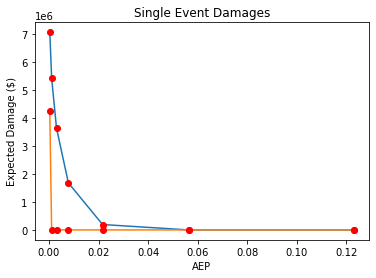

In [49]:
#plot damages per event

single_event_dam_wop = [inventory['JUNE13WOP_DAM_VALUE'].sum(), inventory['JUNE12WOP_DAM_VALUE'].sum(), inventory['JUNE11WOP_DAM_VALUE'].sum(), inventory['JUNE10WOP_DAM_VALUE'].sum(), inventory['JUNE09WOP_DAM_VALUE'].sum(), inventory['JUNE08WOP_DAM_VALUE'].sum(), inventory['JUNE07WOP_DAM_VALUE'].sum()]
single_event_dam_fw = [inventory['JUNE13FW_DAM_VALUE'].sum(), inventory['JUNE12FW_DAM_VALUE'].sum(), inventory['JUNE11FW_DAM_VALUE'].sum(), inventory['JUNE10FW_DAM_VALUE'].sum(), inventory['JUNE09FW_DAM_VALUE'].sum(), inventory['JUNE08FW_DAM_VALUE'].sum(), inventory['JUNE07FW_DAM_VALUE'].sum()]

#CREATE BAR CHART

#without project
plt.plot(frequency, single_event_dam_wop)
plt.plot(frequency, single_event_dam_wop, 'or')

#with floodwall alternative
plt.plot(frequency, single_event_dam_fw)
plt.plot(frequency, single_event_dam_fw, 'or')

plt.title('Single Event Damages')
plt.xlabel('AEP')
plt.ylabel('Expected Damage ($)')

plt.show()

In [50]:
#index in wop_damages_list
(inventory['wop_damages_list'].iloc[1])[0]

29595.10256670973

In [51]:
#Export dataframe to CSV
#inventory.to_csv('C:/Users/l2pdwds9/Desktop/Grand_Junction/Export/GJ_20200815.csv')

In [52]:
np.trapz((29595.10256670973, 22811.79840540783, 15353.1263996687, 7209.106762855229, 0.0, 0.0, 0.0), [0.000347, 0.001092, 0.003056, 0.007838, 0.021628, 0.056328, 0.123101])

160.65261739218045

In [53]:
# integrate across n-year damages to get EAD at a structure https://numpy.org/doc/stable/reference/generated/numpy.trapz.html

# expected annual damages without project
ead_wop = []
for index, row in inventory.iterrows():
   ead_wop.append(np.trapz(inventory['wop_damages_list'].iloc[index], frequency))
inventory['ead_wop'] = ead_wop

# residual damages with floodplain alternative
ead_fw = []
for index, row in inventory.iterrows():
   ead_fw.append(np.trapz(inventory['fw_damages_list'].iloc[index], frequency))
inventory['ead_fw'] = ead_fw

# Alternative approach to calculate EAD at each structure:
#inventory['ead_wop'] = np.trapz(list(zip(inventory.JUNE13WOP_DAM_VALUE, inventory.JUNE12WOP_DAM_VALUE, inventory.JUNE11WOP_DAM_VALUE, inventory.JUNE10WOP_DAM_VALUE, inventory.JUNE09WOP_DAM_VALUE, inventory.JUNE08WOP_DAM_VALUE, inventory.JUNE07WOP_DAM_VALUE)), frequency)

#inventory['ead_fw'] = np.trapz(list(zip(inventory.JUNE13FW_DAM_VALUE, inventory.JUNE12FW_DAM_VALUE, inventory.JUNE11FW_DAM_VALUE, inventory.JUNE10FW_DAM_VALUE, inventory.JUNE09FW_DAM_VALUE, inventory.JUNE08FW_DAM_VALUE, inventory.JUNE07FW_DAM_VALUE)), frequency)

inventory.head()

PARCELNUM          LOCATION     PROPTYPE  IMPVALCUR  IMPASSCUR  \
0  294515429015  417 LAWRENCE AVE  Residential    80330.0     5740.0   
1  294515427024  412 CHULUOTA AVE  Residential    78370.0     5600.0   
2  294515440001     409 W MAIN ST  Residential   134440.0     9610.0   
3  294515400128     522 W MAIN ST       Exempt        0.0        0.0   
4  294515425007      405 PARK AVE  Residential        0.0        0.0   

   IMPVALPRE  IMPASSPRE   Shape_STAr  Shape_STLe    CENTROID_X  ...  \
0    70630.0     5090.0   580.738649  106.692563 -7.474879e+06  ...   
1    71470.0     5150.0   412.127252   95.959131 -7.475471e+06  ...   
2   120000.0     8640.0  1088.966122  167.092720 -7.475143e+06  ...   
3        0.0        0.0   731.922527  126.539910 -7.475373e+06  ...   
4        0.0        0.0   870.176749  121.878587 -7.475948e+06  ...   

   JUNE08FW_DAM_VALUE JUNE09FW_DAM_VALUE  JUNE10FW_DAM_VALUE  \
0                 0.0                0.0                 0.0   
1                 0.0                0.0                 0.0   
2                 0.0                0.0                 0.0   
3                 0.0                0.0                 0.0   
4                 0.0                0.0                 0.0   

   JUNE11FW_DAM_VALUE  JUNE12FW_DAM_VALUE  JUNE13FW_DAM_VALUE  \
0                 0.0                 0.0            0.000000   
1                 0.0                 0.0        12988.743103   
2                 0.0                 0.0            0.000000   
3                 0.0                 0.0            0.000000   
4                 0.0                 0.0            0.000000   

                                    wop_damages_list  \
0                (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)   
1  (29595.10256670973, 22811.79840540783, 15353.1...   
2                (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)   
3                (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)   
4                (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)   

                                     fw_damages_list     ead_wop    ead_fw  
0                (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)    0.000000  0.000000  
1  (12988.743102910123, 0.0, 0.0, 0.0, 0.0, 0.0, ...  160.652617  4.838307  
2                (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)    0.000000  0.000000  
3                (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)    0.000000  0.000000  
4                (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)    0.000000  0.000000  

[5 rows x 60 columns]

In [54]:
# Alternative approach to calculate EAD at each structure:
inventory['ead_wop_TEST'] = np.trapz(list(zip(inventory.JUNE13WOP_DAM_VALUE, inventory.JUNE12WOP_DAM_VALUE, inventory.JUNE11WOP_DAM_VALUE, inventory.JUNE10WOP_DAM_VALUE, inventory.JUNE09WOP_DAM_VALUE, inventory.JUNE08WOP_DAM_VALUE, inventory.JUNE07WOP_DAM_VALUE)), frequency)

inventory['ead_fw_TEST'] = np.trapz(list(zip(inventory.JUNE13FW_DAM_VALUE, inventory.JUNE12FW_DAM_VALUE, inventory.JUNE11FW_DAM_VALUE, inventory.JUNE10FW_DAM_VALUE, inventory.JUNE09FW_DAM_VALUE, inventory.JUNE08FW_DAM_VALUE, inventory.JUNE07FW_DAM_VALUE)), frequency)

inventory.head()

PARCELNUM          LOCATION     PROPTYPE  IMPVALCUR  IMPASSCUR  \
0  294515429015  417 LAWRENCE AVE  Residential    80330.0     5740.0   
1  294515427024  412 CHULUOTA AVE  Residential    78370.0     5600.0   
2  294515440001     409 W MAIN ST  Residential   134440.0     9610.0   
3  294515400128     522 W MAIN ST       Exempt        0.0        0.0   
4  294515425007      405 PARK AVE  Residential        0.0        0.0   

   IMPVALPRE  IMPASSPRE   Shape_STAr  Shape_STLe    CENTROID_X  ...  \
0    70630.0     5090.0   580.738649  106.692563 -7.474879e+06  ...   
1    71470.0     5150.0   412.127252   95.959131 -7.475471e+06  ...   
2   120000.0     8640.0  1088.966122  167.092720 -7.475143e+06  ...   
3        0.0        0.0   731.922527  126.539910 -7.475373e+06  ...   
4        0.0        0.0   870.176749  121.878587 -7.475948e+06  ...   

   JUNE10FW_DAM_VALUE JUNE11FW_DAM_VALUE  JUNE12FW_DAM_VALUE  \
0                 0.0                0.0                 0.0   
1                 0.0                0.0                 0.0   
2                 0.0                0.0                 0.0   
3                 0.0                0.0                 0.0   
4                 0.0                0.0                 0.0   

   JUNE13FW_DAM_VALUE                                   wop_damages_list  \
0            0.000000                (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)   
1        12988.743103  (29595.10256670973, 22811.79840540783, 15353.1...   
2            0.000000                (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)   
3            0.000000                (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)   
4            0.000000                (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)   

                                     fw_damages_list     ead_wop    ead_fw  \
0                (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)    0.000000  0.000000   
1  (12988.743102910123, 0.0, 0.0, 0.0, 0.0, 0.0, ...  160.652617  4.838307   
2                (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)    0.000000  0.000000   
3                (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)    0.000000  0.000000   
4                (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)    0.000000  0.000000   

   ead_wop_TEST  ead_fw_TEST  
0      0.000000     0.000000  
1    160.652617     4.838307  
2      0.000000     0.000000  
3      0.000000     0.000000  
4      0.000000     0.000000  

[5 rows x 62 columns]

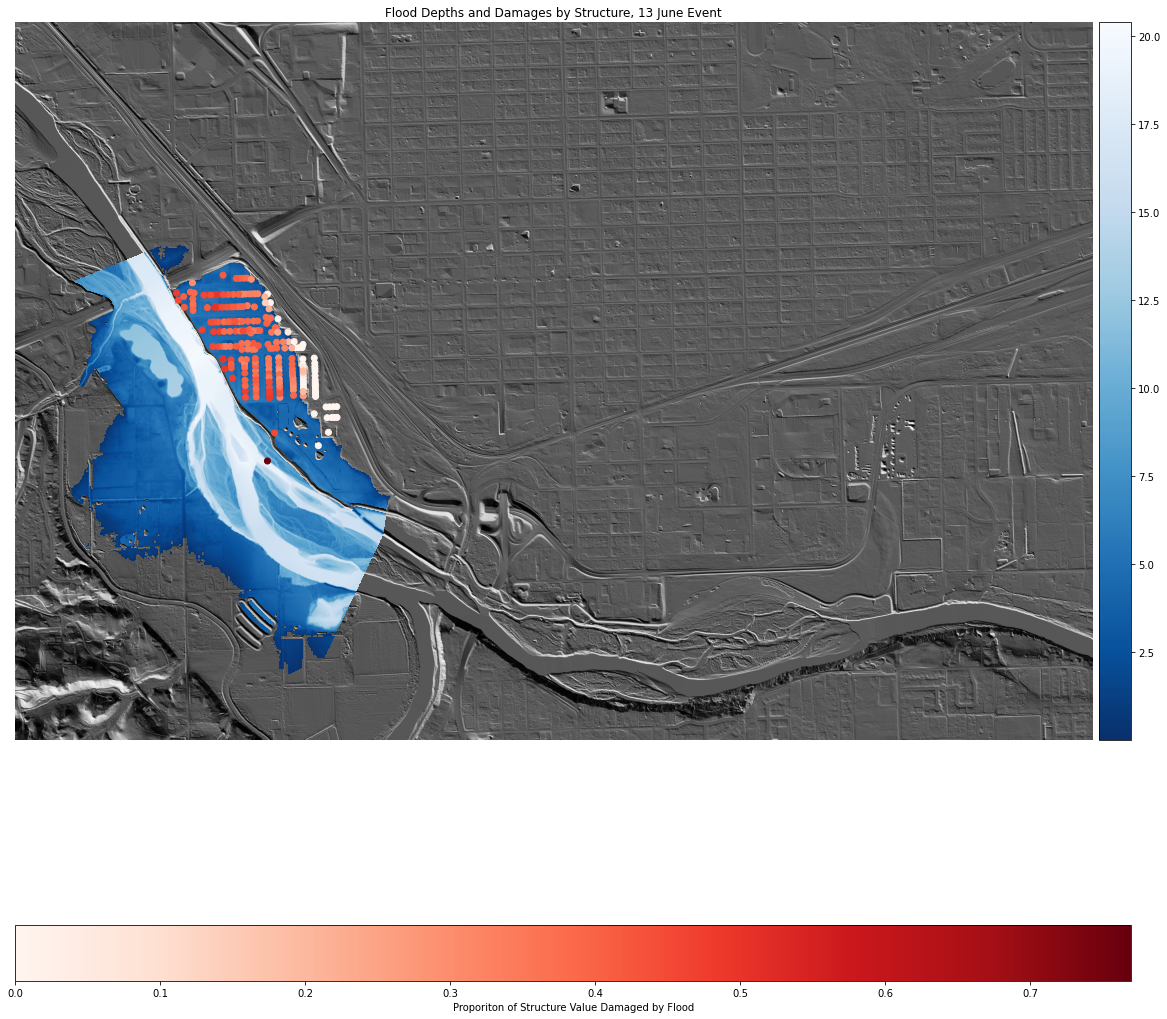

In [125]:
#plot of damages, https://geopandas.org/gallery/plotting_with_geoplot.html#sphx-glr-gallery-plotting-with-geoplot-py

#https://www.earthdatascience.org/courses/scientists-guide-to-plotting-data-in-python/plot-spatial-data/customize-raster-plots/interactive-maps/


fig, ax = plt.subplots(figsize=(20, 20))
ep.plot_bands(hillshade, extent=plotting_extent(dataset), cmap='Greys', title="Flood Depths and Damages by Structure, 13 June Event", scale=False, ax=ax, cbar=False)
ep.plot_bands(floodplain13june, extent=plotting_extent(dataset), cmap='Blues_r', scale=False, ax=ax)
inventory.plot(column='JUNE13WOP_DAM_PERCENT', ax=ax, legend=True, legend_kwds={'label': "Proporiton of Structure Value Damaged by Flood", 'orientation': "horizontal"}, cmap='Reds')
ax.set_axis_off()
plt.show()

In [55]:
#Export dataframe to CSV
inventory.to_csv('C:/Users/l2pdwds9/Desktop/Grand_Junction/Export/GJ_20200902.csv')

In [56]:
#calculating EAD with and without project

#EAD without project
ead_wop_total = inventory['ead_wop'].sum()

#EAD with project (residual damages) for floodwall alternative
ead_fw_total = inventory['ead_fw'].sum()

print(ead_wop_total, ead_fw_total)

42455.118333189894 1574.8455558097978


In [57]:
print(f"\tExpected annual damages without project in the study area are ${int(round(ead_wop_total)):,}.")

Expected annual damages without project in the study area are $42,455.


In [58]:
print(f"\tResidual damages with the floodwall alternative in place are ${int(round(ead_fw_total)):,}.")

Residual damages with the floodwall alternative in place are $1,575.


In [59]:
#calculating benefits as a reduction in damages (without project EAD minus with_project EAD for floodwall alternative)

inventory['fw_benefits'] = inventory['ead_wop']-inventory['ead_fw']


In [60]:
ead_wop_total-ead_fw_total

40880.272777380094

In [61]:
benefits_total = inventory['fw_benefits'].sum()
benefits_total

print(f"\tThe annual benefits of the project are ${int(round(benefits_total)):,}.")

The annual benefits of the project are $40,880.


<b> Calculate Annualized Costs </b>

In [62]:
#cost and project life inputs
fw_first_cost = 11000000
discount_rate = 0.0275
project_life = 50

In [63]:
#capital recovery factor (CRF)
crf = (1/(np.pv(discount_rate,project_life,-1)))
crf

0.03704091950138626

In [64]:
#Annual cost
annual_cost = crf*fw_first_cost
print(f"\tThe annual cost of the project is ${int(round(annual_cost)):,}.")

The annual cost of the project is $407,450.


In [65]:
#Net benefits
net_benefits=benefits_total-annual_cost
print(f"\tThe net benefits of the project are ${int(round(net_benefits)):,}.")

The net benefits of the project are $-366,570.


In [66]:
#Benefit to Cost Ratio
bcr = benefits_total/annual_cost
print(f"\tThe Benefit to Cost Ratio (BCR) of the floodwall alternative is {round(bcr,4)}.")

The Benefit to Cost Ratio (BCR) of the floodwall alternative is 0.1003.


In [67]:
#create summary table
summary_table = [('Expected Annual Damages (EAD)', f"${int(round(ead_wop_total)):,}"), ('First Cost', f"${fw_first_cost:,}"), ('Project Life', f"{project_life} years"), ('Annualized Cost', f"${int(round(annual_cost)):,}"), ('Residual Damages', f"${int(round(ead_fw_total)):,}."), ('Net Benefits', f"${int(round(net_benefits)):,}."), ('BCR', f"{round(bcr,4)}")]

In [68]:
import pandas as pd
summary_table_df = pd.DataFrame(summary_table)

In [69]:
#summary_table_df.to_csv('C:/Users/l2pdwds9/Desktop/Grand_Junction/Export/summary_table_20200826.csv', index=False, header=False)

In [70]:
#Creating a sliders using ipywidgets to change first floor elevation
import ipywidgets as widgets

In [76]:
widgets.FloatSlider()

FloatSlider(value=0.0)

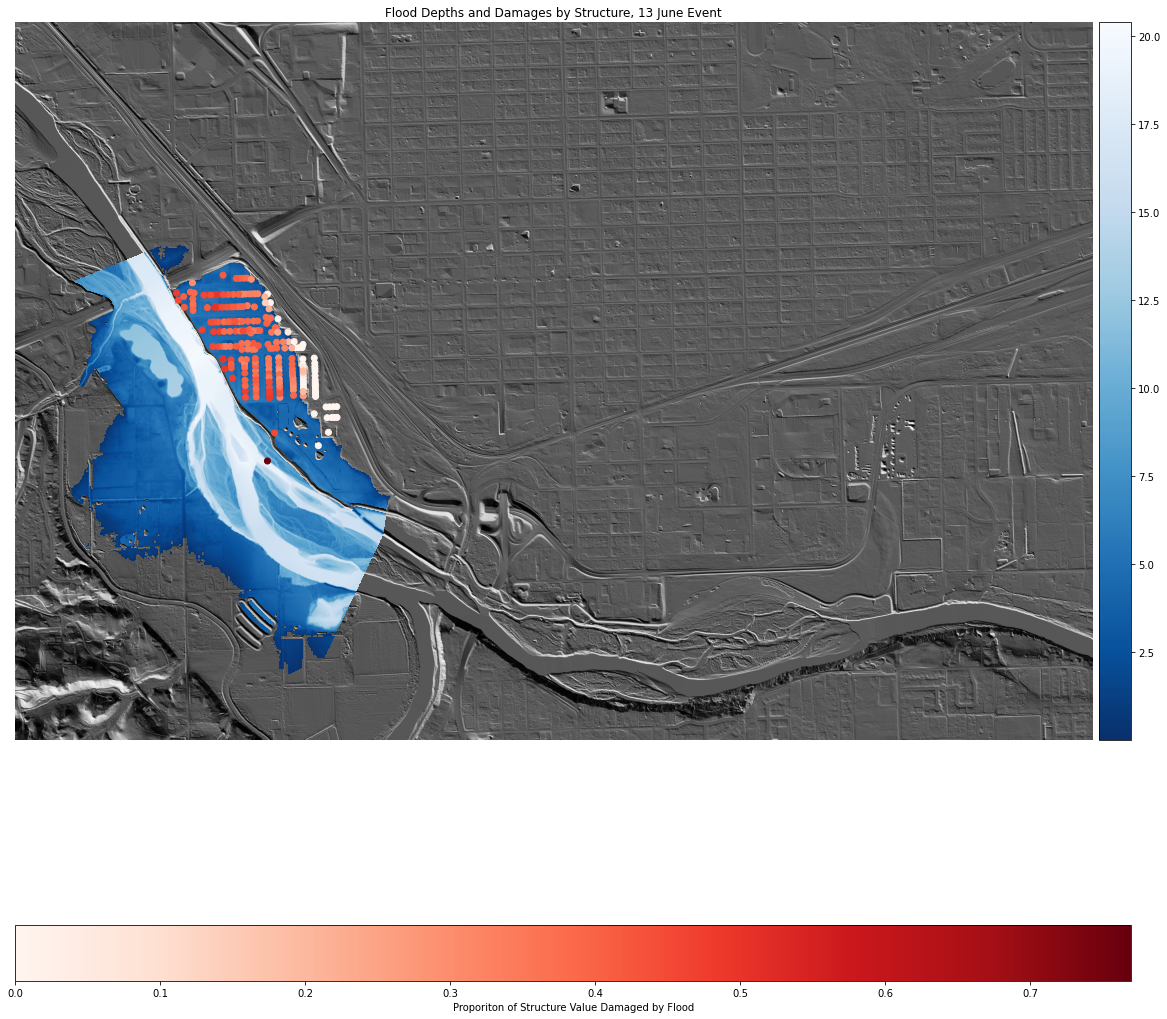

In [126]:
#GOAL: create a slider to for users to change structure value or first floor elevation and dynamically see changes in the figure below.

fig, ax = plt.subplots(figsize=(20, 20))
ep.plot_bands(hillshade, extent=plotting_extent(dataset), cmap='Greys', title="Flood Depths and Damages by Structure, 13 June Event", scale=False, ax=ax, cbar=False)
ep.plot_bands(floodplain13june, extent=plotting_extent(dataset), cmap='Blues_r', scale=False, ax=ax)
inventory.plot(column='JUNE13WOP_DAM_PERCENT', ax=ax, legend=True, legend_kwds={'label': "Proporiton of Structure Value Damaged by Flood", 'orientation': "horizontal"}, cmap='Reds')
ax.set_axis_off()
plt.show()